# Comparison of Results from Differential Gene Expression Analysis 

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

In [12]:
BL_df = pd.read_csv('../outputData/gPD_DEG_BL.csv' , index_col=0)
V02_df = pd.read_csv('../outputData/gPD_DEG_V02.csv' , index_col=0)
V04_df = pd.read_csv('../outputData/gPD_DEG_V04.csv' , index_col=0)
V06_df = pd.read_csv('../outputData/gPD_DEG_V06.csv' , index_col=0)
V08_df = pd.read_csv('../outputData/gPD_DEG_V08.csv' , index_col=0)

In [57]:
de_count_overlap = []
for time in ['BL' , 'V02' , 'V04' , 'V06' , 'V08'] : 
    df = pd.read_csv('../outputData/gPD_DEG_'+time+'.csv' , index_col=0)
    df2 = pd.read_csv('../outputData/iPD_DEG_'+time+'.csv' , index_col=0)
    de_count_overlap.append(sum(df['de'] & df2['de']))

In [74]:
de_count_gPD

[5954, 2116, 4942, 7186, 1668]

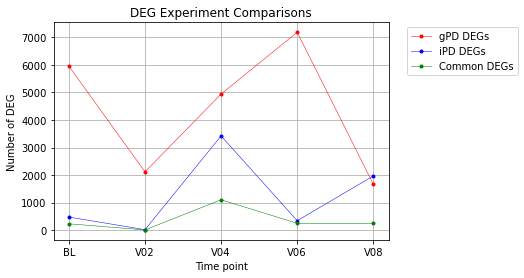

In [73]:
plt.plot(['BL' , 'V02' , 'V04' , 'V06' , 'V08']  , de_count_gPD , 'r.-' , linewidth = 0.5 , label = 'gPD DEGs')
plt.plot(['BL' , 'V02' , 'V04' , 'V06' , 'V08']  , de_count_iPD , 'b.-' , linewidth = 0.5 , label = 'iPD DEGs')
plt.plot(['BL' , 'V02' , 'V04' , 'V06' , 'V08']  , de_count_overlap , 'g.-' , linewidth = 0.5 , label = 'Common DEGs')
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.xlabel('Time point')
plt.ylabel('Number of DEG')
plt.grid()
plt.title('DEG Experiment Comparisons')
plt.savefig('./../Plots/DEG_comparison.png' , bbox_inches = 'tight')

In [72]:
de_count_iPD

[474, 15, 3421, 342, 1965]

In [20]:
len(set(BL_df.index) & set(V02_df.index)  & set(V04_df.index)  & set(V06_df.index)  & set(V08_df.index))/min(len(BL_df.index),len(V02_df.index),len(V04_df.index),len(V06_df.index),len(V08_df.index))*100

99.47120469185656

In [13]:
BL_diff_df = BL_df[BL_df['de']]
V02_diff_df = V02_df[V02_df['de']]
V04_diff_df = V04_df[V04_df['de']]
V06_diff_df = V06_df[V06_df['de']]
V08_diff_df = V08_df[V08_df['de']]

## Similarity Comparison of Results

### Sorted by Log Fold Change

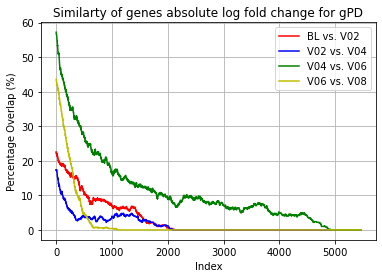

In [14]:
ordered_BL = BL_diff_df.reindex(BL_diff_df['log2FoldChange'].abs().sort_values(ascending=False).index)
ordered_V02 = V02_diff_df.reindex(V02_diff_df['log2FoldChange'].abs().sort_values(ascending=False).index)
ordered_V04 = V04_diff_df.reindex(V04_diff_df['log2FoldChange'].abs().sort_values(ascending=False).index)
ordered_V06 = V06_diff_df.reindex(V06_diff_df['log2FoldChange'].abs().sort_values(ascending=False).index)
ordered_V08 = V08_diff_df.reindex(V08_diff_df['log2FoldChange'].abs().sort_values(ascending=False).index)

count_BL =[]
count_V02 = []
count_V04 = []
count_V06 = []
count_V08 = []

batch = 500
for i in range(1 , len(ordered_BL)-batch) : 
    count_BL.append(len(set(ordered_BL.index[i:i+batch]) & set(ordered_V02.index[i:i+batch]))*100/batch)
    count_V02.append(len(set(ordered_V04.index[i:i+batch]) & set(ordered_V02.index[i:i+batch]))*100/batch)
    count_V04.append(len(set(ordered_V04.index[i:i+batch]) & set(ordered_V06.index[i:i+batch]))*100/batch)
    count_V06.append(len(set(ordered_V06.index[i:i+batch]) & set(ordered_V08.index[i:i+batch]))*100/batch)
    
 
plt.plot(count_BL , 'r' , label = 'BL vs. V02')
plt.plot(count_V02 , 'b' , label = 'V02 vs. V04')
plt.plot(count_V04 , 'g' , label = 'V04 vs. V06')
plt.plot(count_V06 , 'y' , label = 'V06 vs. V08')
plt.title('Similarty of genes absolute log fold change for gPD')
plt.ylabel('Percentage Overlap (%)')
plt.xlabel('Index')
plt.legend()
plt.grid()
plt.savefig('./../Plots/iPD_similariy_logfc.png')

### Sorted by adjusted p-value

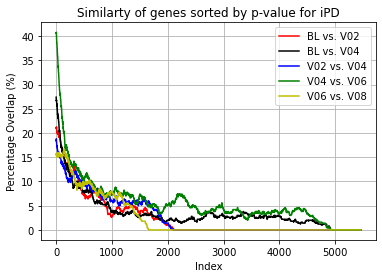

In [17]:
ordered_BL = BL_diff_df.reindex(BL_diff_df['padj'].sort_values(ascending=True).index)
ordered_V02 = V02_diff_df.reindex(V02_diff_df['padj'].sort_values(ascending=True).index)
ordered_V04 = V04_diff_df.reindex(V04_diff_df['padj'].sort_values(ascending=True).index)
ordered_V06 = V06_diff_df.reindex(V06_diff_df['padj'].sort_values(ascending=True).index)
ordered_V08 = V08_diff_df.reindex(V08_diff_df['padj'].sort_values(ascending=True).index)

count_BL =[]
count_V02 = []
count_V04 = []
count_V06 = []
count_V08 = []
count_xtra = []

batch = 500
for i in range(1 , len(ordered_BL)-batch) : 
    count_BL.append(len(set(ordered_BL.index[i:i+batch]) & set(ordered_V02.index[i:i+batch]))*100/batch)
    count_V02.append(len(set(ordered_V04.index[i:i+batch]) & set(ordered_V02.index[i:i+batch]))*100/batch)
    count_xtra.append(len(set(ordered_V04.index[i:i+batch]) & set(ordered_BL.index[i:i+batch]))*100/batch)
    count_V04.append(len(set(ordered_V04.index[i:i+batch]) & set(ordered_V06.index[i:i+batch]))*100/batch)
    count_V06.append(len(set(ordered_V06.index[i:i+batch]) & set(ordered_V08.index[i:i+batch]))*100/batch)
    
 
plt.plot(count_BL , 'r' , label = 'BL vs. V02')
plt.plot(count_xtra , 'k' , label = 'BL vs. V04')
plt.plot(count_V02 , 'b' , label = 'V02 vs. V04')
plt.plot(count_V04 , 'g' , label = 'V04 vs. V06')
plt.plot(count_V06 , 'y' , label = 'V06 vs. V08')
plt.title('Similarty of genes sorted by p-value for iPD')
plt.ylabel('Percentage Overlap (%)')
plt.xlabel('Index')
plt.legend()
plt.grid()
plt.savefig('./../Plots/iPD_similariy_pval.png' , bbox_inches = 'tight' , dpi = 200)

In [18]:
BL_diff_df

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,de
ENSG00000210082.2,1580.855789,-0.796122,0.153026,-5.202527,1.965972e-07,0.002895,True
ENSG00000135378.3,1329.444544,0.315291,0.063533,4.962618,6.954922e-07,0.003414,True
ENSG00000257878.1,563.809237,0.286294,0.057116,5.012508,5.372504e-07,0.003414,True
ENSG00000163568.14,530.522743,0.333287,0.073338,4.544511,5.506305e-06,0.011585,True
ENSG00000134321.11,2369.401696,0.725392,0.158659,4.572032,4.830176e-06,0.011585,True
...,...,...,...,...,...,...,...
ENSG00000259651.2,238.562407,0.198289,0.069735,2.843466,4.462572e-03,0.098538,True
ENSG00000062716.12,17377.863893,0.107476,0.037813,2.842325,4.478582e-03,0.098743,True
ENSG00000272498.1,201.509652,-0.156933,0.055269,-2.839449,4.519147e-03,0.099192,True
ENSG00000256269.8,211.977810,-0.170740,0.060127,-2.839678,4.515904e-03,0.099192,True


In [29]:
gpd_all

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,de,baseMean,log2FoldChange,lfcSE,...,pvalue,padj,de,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,de
ENSG00000174886.12,380.081149,-0.505607,0.052174,-9.690734,3.301465e-22,6.979627e-18,True,267.902517,0.117713,0.033731,...,1.026301e-34,2.166315e-30,True,418.478892,-0.076439,0.091671,-0.833839,0.404372,0.707940,False
ENSG00000166136.15,410.428928,-0.267486,0.028623,-9.345306,9.162419e-21,9.685135e-17,True,357.830068,0.052088,0.021919,...,1.167503e-16,1.120166e-13,True,411.958891,-0.015422,0.057362,-0.268859,0.788038,0.923034,False
ENSG00000241468.7,328.088147,-0.341068,0.038808,-8.788569,1.514766e-18,1.067456e-14,True,275.139700,0.048209,0.029527,...,2.393974e-24,8.421999e-21,True,343.003384,-0.001719,0.070626,-0.024339,0.980582,0.994136,False
ENSG00000135441.7,180.730543,-0.376710,0.044979,-8.375314,5.507675e-17,2.910944e-13,True,143.773679,0.109309,0.037350,...,1.487711e-17,1.962663e-14,True,194.717830,0.058457,0.083928,0.696513,0.486108,0.762826,False
ENSG00000280828.1,519.375634,0.267170,0.032066,8.331953,7.951973e-17,3.362253e-13,True,582.007827,0.158602,0.029200,...,7.100944e-24,2.141239e-20,True,479.020558,0.229750,0.053240,4.315347,0.000016,0.009471,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000143333.6,13.949303,-0.000061,0.100398,-0.000603,9.995186e-01,9.997078e-01,False,13.920799,-0.080362,0.103561,...,1.226598e-04,9.671657e-04,True,13.080427,-0.525271,0.172138,-3.051451,0.002277,0.055558,True
ENSG00000185436.11,152.234136,0.000023,0.051485,0.000454,9.996379e-01,9.997325e-01,False,161.368865,0.068799,0.054903,...,5.091908e-02,1.170296e-01,False,131.692003,-0.184094,0.106687,-1.725547,0.084429,0.335325,False
ENSG00000132286.11,598.851348,-0.000010,0.020168,-0.000486,9.996119e-01,9.997325e-01,False,604.035421,0.042311,0.021444,...,1.704121e-01,2.893386e-01,False,555.820490,-0.069732,0.037592,-1.854963,0.063602,0.291997,False
ENSG00000178038.16,332.937615,-0.000018,0.057691,-0.000313,9.997502e-01,9.997502e-01,False,359.653291,-0.025625,0.054631,...,6.058192e-01,7.152719e-01,False,296.954824,-0.201389,0.115163,-1.748721,0.080339,0.326920,False


In [31]:
ipd_all.columns

Index(['baseMean', 'log2FoldChange', 'lfcSE', 'stat', 'pvalue', 'padj', 'de',
       'baseMean', 'log2FoldChange', 'lfcSE', 'stat', 'pvalue', 'padj', 'de',
       'baseMean', 'log2FoldChange', 'lfcSE', 'stat', 'pvalue', 'padj', 'de',
       'baseMean', 'log2FoldChange', 'lfcSE', 'stat', 'pvalue', 'padj', 'de',
       'baseMean', 'log2FoldChange', 'lfcSE', 'stat', 'pvalue', 'padj', 'de'],
      dtype='object')

In [33]:
for i in [6,13,20,27,34] : 
    print(sum(ipd_all.iloc[:,i]))

457
9
2868
342
1909


In [28]:
gpd_all = pd.concat([BL_df , V02_df , V04_df , V06_df , V08_df] , axis = 1 , join='inner')

idx = np.where(gpd_all['de'].sum(axis = 1) >= 3)[0]
gpd_all_de = gpd_all.iloc[idx , ]

gpd_all_de

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,de,baseMean,log2FoldChange,lfcSE,...,pvalue,padj,de,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,de
ENSG00000174886.12,380.081149,-0.505607,0.052174,-9.690734,3.301465e-22,6.979627e-18,True,267.902517,0.117713,0.033731,...,1.026301e-34,2.166315e-30,True,418.478892,-0.076439,0.091671,-0.833839,0.404372,0.707940,False
ENSG00000166136.15,410.428928,-0.267486,0.028623,-9.345306,9.162419e-21,9.685135e-17,True,357.830068,0.052088,0.021919,...,1.167503e-16,1.120166e-13,True,411.958891,-0.015422,0.057362,-0.268859,0.788038,0.923034,False
ENSG00000241468.7,328.088147,-0.341068,0.038808,-8.788569,1.514766e-18,1.067456e-14,True,275.139700,0.048209,0.029527,...,2.393974e-24,8.421999e-21,True,343.003384,-0.001719,0.070626,-0.024339,0.980582,0.994136,False
ENSG00000135441.7,180.730543,-0.376710,0.044979,-8.375314,5.507675e-17,2.910944e-13,True,143.773679,0.109309,0.037350,...,1.487711e-17,1.962663e-14,True,194.717830,0.058457,0.083928,0.696513,0.486108,0.762826,False
ENSG00000280828.1,519.375634,0.267170,0.032066,8.331953,7.951973e-17,3.362253e-13,True,582.007827,0.158602,0.029200,...,7.100944e-24,2.141239e-20,True,479.020558,0.229750,0.053240,4.315347,0.000016,0.009471,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000160145.15,163.197757,0.000456,0.081706,0.005584,9.955450e-01,9.975181e-01,False,169.715868,-0.139764,0.085159,...,8.481509e-06,1.114283e-04,True,153.257205,-0.419513,0.151695,-2.765496,0.005684,0.085181,True
ENSG00000231419.6,26.731324,0.000711,0.153388,0.004637,9.963005e-01,9.978581e-01,False,25.655865,-0.094297,0.156855,...,4.535972e-04,2.759230e-03,True,23.732531,-0.807592,0.292130,-2.764499,0.005701,0.085375,True
ENSG00000139278.9,8461.814385,-0.000180,0.042810,-0.004194,9.966536e-01,9.979754e-01,False,8905.769544,0.051965,0.044407,...,3.021011e-03,1.264225e-02,True,8042.346651,0.218848,0.076972,2.843228,0.004466,0.076148,True
ENSG00000158270.11,16.339825,-0.000464,0.153216,-0.003027,9.975849e-01,9.984350e-01,False,17.821985,-0.419067,0.155861,...,2.461978e-08,1.067093e-06,True,17.255732,-0.783921,0.269269,-2.911293,0.003599,0.069044,True


In [18]:
ipd_all = pd.concat([BL_df , V02_df , V04_df , V06_df , V08_df] , axis = 1 , join='inner')

idx = np.where(ipd_all['de'].sum(axis = 1) >= 2)[0]
ipd_all_de = ipd_all.iloc[idx , ]

ipd_all_de

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,de,baseMean,log2FoldChange,lfcSE,...,pvalue,padj,de,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,de
ENSG00000135378.3,1329.444544,0.315291,0.063533,4.962618,6.954922e-07,0.003414,True,1266.921729,0.222394,0.061032,...,0.001371,0.073698,True,1167.829736,0.138361,0.064633,2.140715,0.032297,0.138106,False
ENSG00000257878.1,563.809237,0.286294,0.057116,5.012508,5.372504e-07,0.003414,True,607.913290,0.233102,0.059861,...,0.000066,0.041387,True,550.380166,0.301782,0.065260,4.624320,0.000004,0.005057,True
ENSG00000163568.14,530.522743,0.333287,0.073338,4.544511,5.506305e-06,0.011585,True,516.621145,-0.019607,0.075163,...,0.009735,0.147297,False,456.409753,0.030125,0.067295,0.447653,0.654404,0.795694,False
ENSG00000134321.11,2369.401696,0.725392,0.158659,4.572032,4.830176e-06,0.011585,True,2030.398448,0.042064,0.156598,...,0.000015,0.036419,True,1709.680843,-0.078672,0.162140,-0.485213,0.627526,0.777874,False
ENSG00000123610.4,788.822463,0.461527,0.101527,4.545850,5.471400e-06,0.011585,True,718.638395,0.138284,0.104239,...,0.006586,0.124989,False,689.521929,0.285026,0.097563,2.921473,0.003484,0.049067,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000146112.11,1423.765870,-0.000382,0.065847,-0.005795,9.953762e-01,0.998563,False,1564.405645,0.078398,0.057293,...,0.002914,0.096300,True,1304.844660,0.266748,0.077947,3.422170,0.000621,0.023056,True
ENSG00000198301.11,998.106467,0.000135,0.031286,0.004325,9.965494e-01,0.999188,False,970.276849,-0.032778,0.033148,...,0.020879,0.196688,False,878.038541,-0.101203,0.037461,-2.701556,0.006902,0.063994,True
ENSG00000161202.18,348.202643,-0.000198,0.055819,-0.003554,9.971645e-01,0.999510,False,415.629596,0.016928,0.052942,...,0.123346,0.424178,False,343.543633,0.162808,0.067513,2.411512,0.015887,0.096139,True
ENSG00000146731.10,1907.578376,-0.000074,0.030920,-0.002377,9.981032e-01,0.999510,False,1897.878672,-0.022729,0.032126,...,0.002032,0.084228,True,1704.352405,-0.068209,0.036472,-1.870174,0.061460,0.198241,False


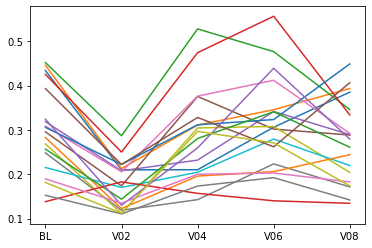

In [114]:
for i in range(1,20) :
    plt.plot(['BL' , 'V02' , 'V04' , 'V06' , 'V08']  , all_de['log2FoldChange'].iloc[i,:])

In [185]:
all_de.to_csv('./../outputData/iPD_common_de2.csv')

## Further Analysis of DESeq vs. Paper

In [8]:
merge_df = pd.merge(deseq_df , paper_df, on='gene_id')

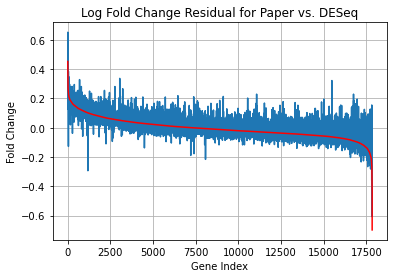

In [9]:
merge_df_sorted = merge_df.reindex(merge_df.logFC.sort_values(ascending=False).index).reset_index()
plt.plot(merge_df_sorted['log2FoldChange'] )
plt.plot(merge_df_sorted['logFC'] , 'r')
plt.ylabel('Fold Change')
plt.xlabel('Gene Index')
plt.title('Log Fold Change Residual for Paper vs. DESeq')
plt.grid()
plt.savefig('./../Plots/dp_lfcres.png')

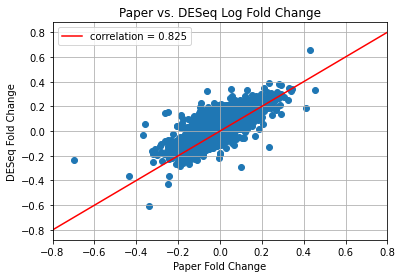

In [9]:
plt.scatter(merge_df['logFC'] , merge_df['log2FoldChange'] )
x = np.linspace(-0.8,0.8,100)
y = x
plt.plot(x,y , 'r' , label = 'correlation = %1.3f' % np.corrcoef(merge_df['logFC'] , merge_df['log2FoldChange'])[0][1])
plt.legend()
plt.xlim([-0.8 , 0.8])
plt.xlabel('Paper Fold Change')
plt.ylabel('DESeq Fold Change')
plt.title('Paper vs. DESeq Log Fold Change')
plt.grid()
plt.savefig('./../Plots/dp_lfc.png')

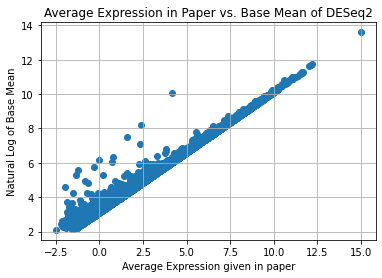

In [11]:
plt.scatter(merge_df['AveExpr'] , np.log(merge_df['baseMean']))
plt.title('Average Expression in Paper vs. Base Mean of DESeq2')
plt.ylabel('Natural Log of Base Mean')
plt.xlabel('Average Expression given in paper')
plt.grid()
plt.savefig('./../Plots/dp_aveexpr.png')

## Further Analysis of DESeq vs. Limma

In [12]:
merge_df = pd.merge(deseq_df , limma_df, on='gene_id')

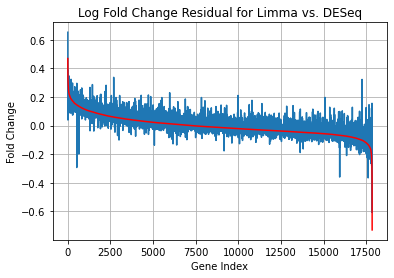

In [13]:
merge_df_sorted = merge_df.reindex(merge_df.logFC.sort_values(ascending=False).index).reset_index()
plt.plot(merge_df_sorted['log2FoldChange'] )
plt.plot(merge_df_sorted['logFC'] , 'r')
plt.ylabel('Fold Change')
plt.xlabel('Gene Index')
plt.title('Log Fold Change Residual for Limma vs. DESeq')
plt.grid()
plt.savefig('./../Plots/dl_lfcres.png')

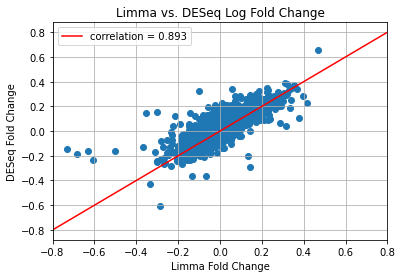

In [14]:
plt.scatter(merge_df['logFC'] , merge_df['log2FoldChange'] )
x = np.linspace(-0.8,0.8,100)
y = x
plt.plot(x,y , 'r' , label = 'correlation = %1.3f' % np.corrcoef(merge_df['logFC'] , merge_df['log2FoldChange'])[0][1])
plt.legend()
plt.xlim([-0.8 , 0.8])
plt.xlabel('Limma Fold Change')
plt.ylabel('DESeq Fold Change')
plt.title('Limma vs. DESeq Log Fold Change')
plt.grid()
plt.savefig('./../Plots/dl_lfc.png')

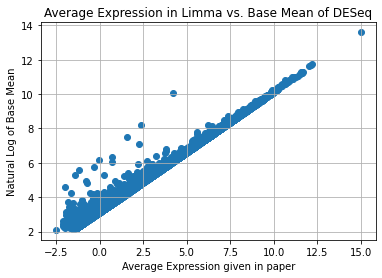

In [15]:
plt.scatter(merge_df['AveExpr'] , np.log(merge_df['baseMean']))
plt.title('Average Expression in Limma vs. Base Mean of DESeq')
plt.ylabel('Natural Log of Base Mean')
plt.xlabel('Average Expression given in paper')
plt.grid()
plt.savefig('./../Plots/dl_aveexpr.png')

## Further Analysis of Limma vs. Paper

In [16]:
merge_df = pd.merge(paper_df , limma_df, on='gene_id')

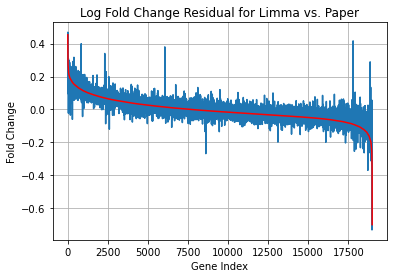

In [34]:
merge_df_sorted = merge_df.reindex(merge_df.logFC_x.sort_values(ascending=False).index).reset_index()
plt.plot(merge_df_sorted['logFC_y'] )
plt.plot(merge_df_sorted['logFC_x'] , 'r')
plt.ylabel('Fold Change')
plt.xlabel('Gene Index')
plt.title('Log Fold Change Residual for Limma vs. Paper')
plt.grid()
plt.savefig('./../Plots/lp_lfcexpr.png')

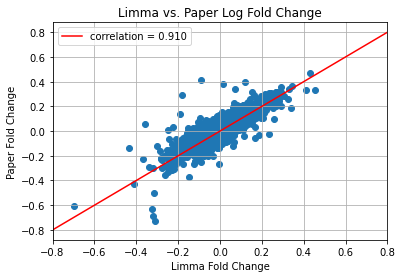

In [35]:
plt.scatter(merge_df['logFC_x'] , merge_df['logFC_y'] )
x = np.linspace(-0.8,0.8,100)
y = x
plt.plot(x,y , 'r' , label = 'correlation = %1.3f' % np.corrcoef(merge_df['logFC_x'] , merge_df['logFC_y'])[0][1])
plt.legend()
plt.xlim([-0.8 , 0.8])
plt.xlabel('Limma Fold Change')
plt.ylabel('Paper Fold Change')
plt.title('Limma vs. Paper Log Fold Change')
plt.grid()
plt.savefig('./../Plots/lp_lfc.png')

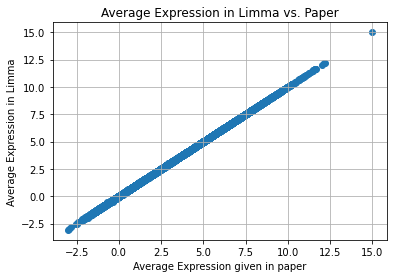

In [36]:
plt.scatter(merge_df['AveExpr_x'] , merge_df['AveExpr_y'])
plt.title('Average Expression in Limma vs. Paper')
plt.ylabel('Average Expression in Limma')
plt.xlabel('Average Expression given in paper')
plt.grid()
plt.savefig('./../Plots/lp_aveexpr.png')